In [51]:
import sys
sys.path.append('..')
from scripts.predict import get_location_data, get_data, cross_validation
from google.cloud import bigquery
from scripts.download_data import download_all_data
import numpy as np
import matplotlib.pyplot as plt
from pandas import Timestamp
from datetime import timedelta

In [52]:
X, Y = get_data('../data/raw/data.p')

In [53]:
locations_df = get_location_data('../data/raw/channels.csv', ['location', 'id', 'lat', 'long'])
locations_df.head()

,location,id,lat,long
0,Ntinda,930434,0.360209,32.610756
1,Bugolobi,718028,0.307500,32.620600
2,Nantabulirwa,912224,0.346460,32.703280
3,Kireka,930426,0.365500,32.646800
4,Luwafu,930427,0.268900,32.588000


In [54]:
f = lambda time: Timestamp.fromtimestamp(time*3600)

In [55]:
f2 = np.vectorize(f)

In [56]:
longs = [X[:,0][index] for index in sorted(np.unique(X[:,0], return_index=True)[1])]
lats = [X[:,1][index] for index in sorted(np.unique(X[:,1], return_index=True)[1])]

In [57]:
rmse_list =[]

Ntinda successful
Bugolobi successful
Nantabulirwa successful
Kireka successful
Luwafu successful
Banda successful
Nakasero II successful
Kiwatule successful
Kyaliwajjala successful
Nansana West successful
Nansana East successful
Busega successful
Bunamwaya successful
Kyebando successful
Bukoto I successful
Kansanga successful
Kasubi successful
Naguru II successful
Makindye I successful
Makerere University successful
Bweyogerere successful


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Civic Centre successful
Kiwafu successful
Kireka successful
Seguku successful
Seguku(2) successful
Lukuli(2) successful
Nakasero II(2) successful
Kyengera successful
Kisugu successful


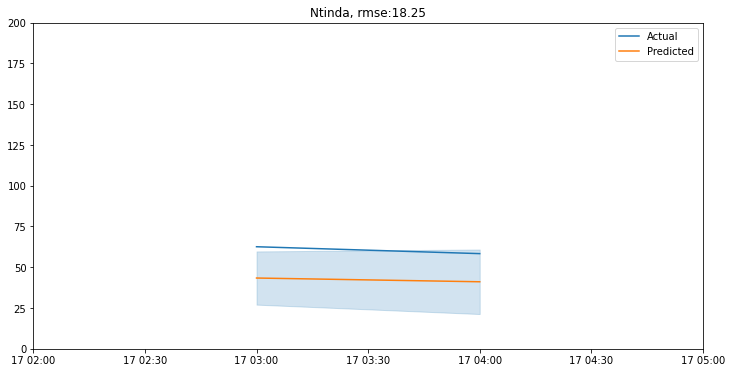

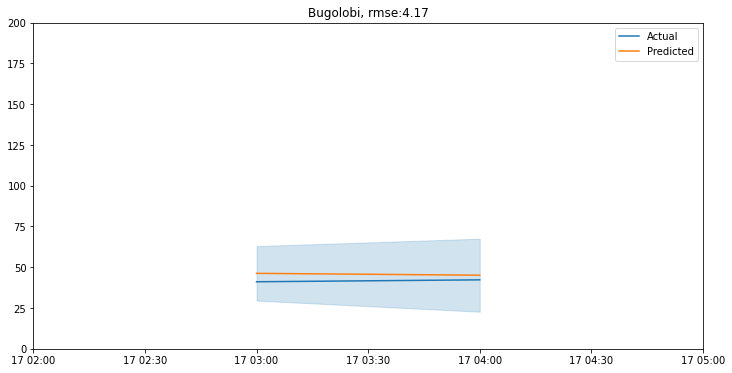

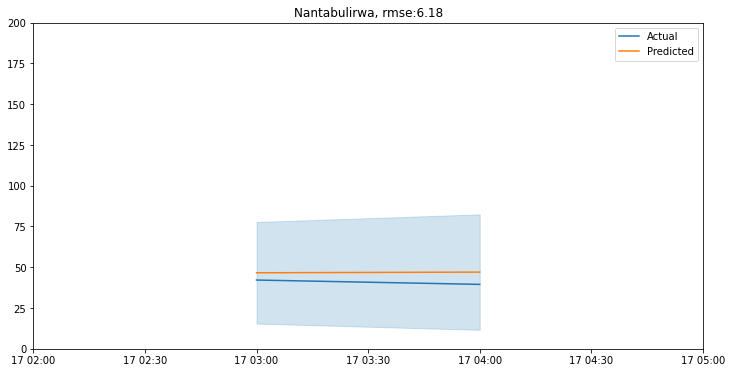

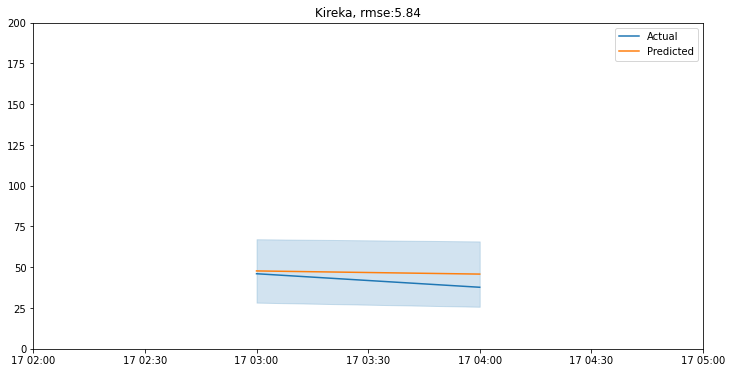

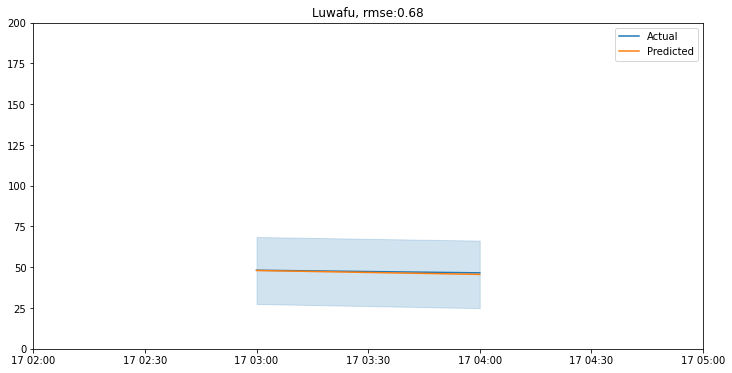

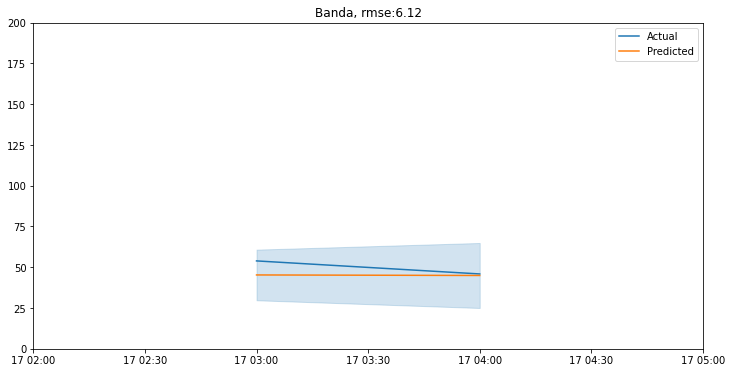

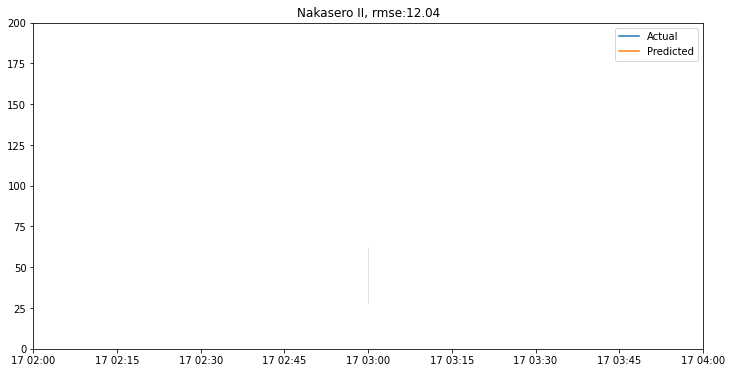

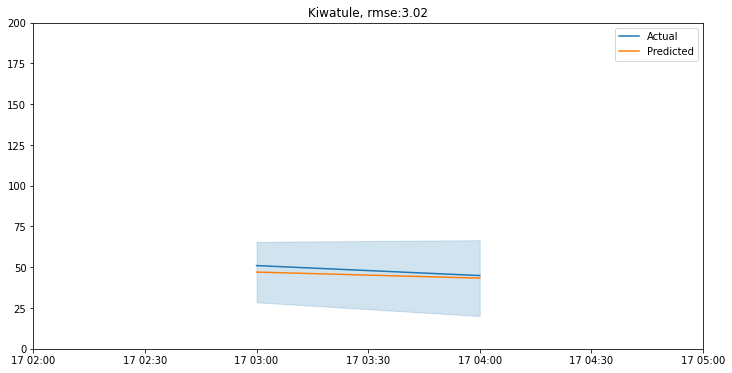

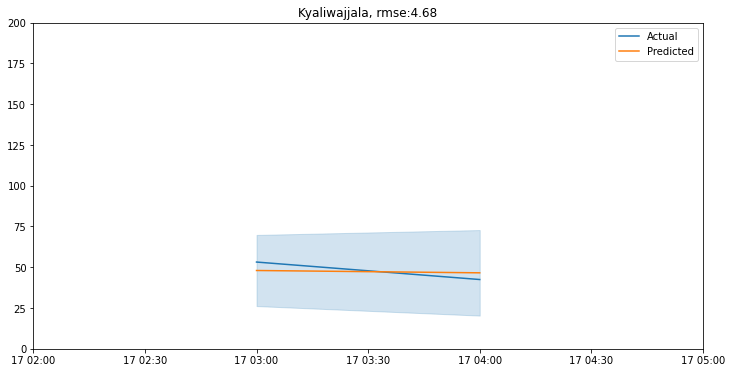

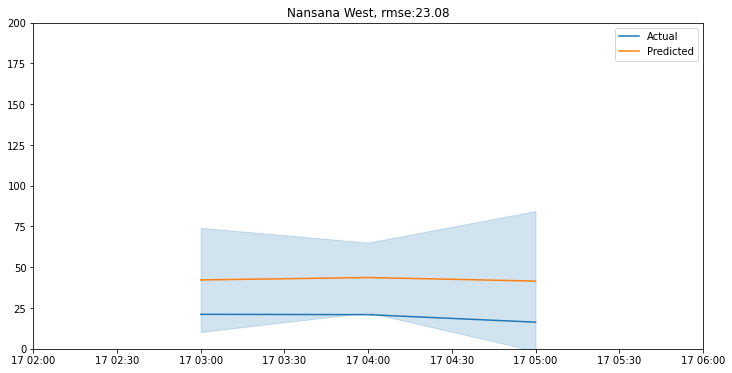

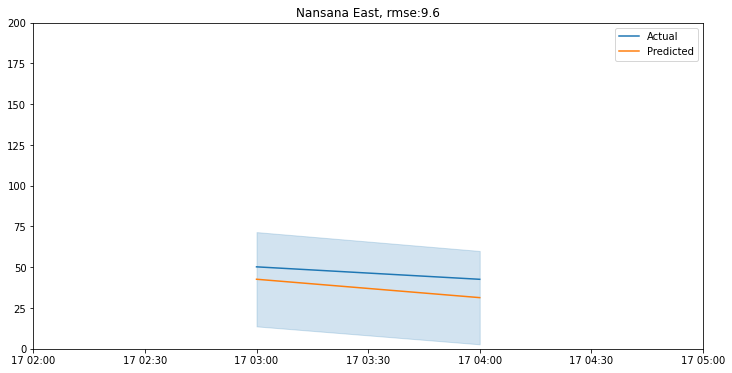

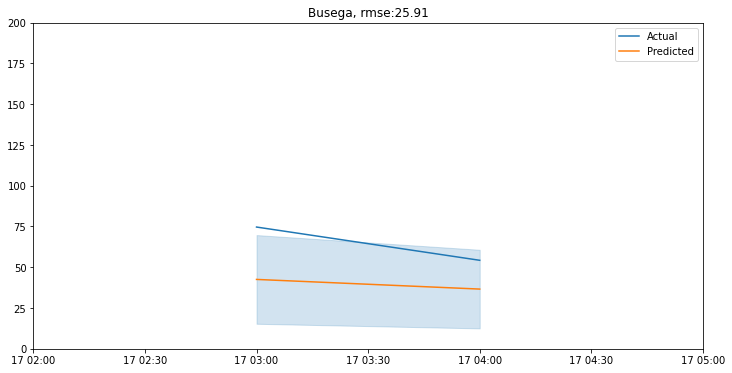

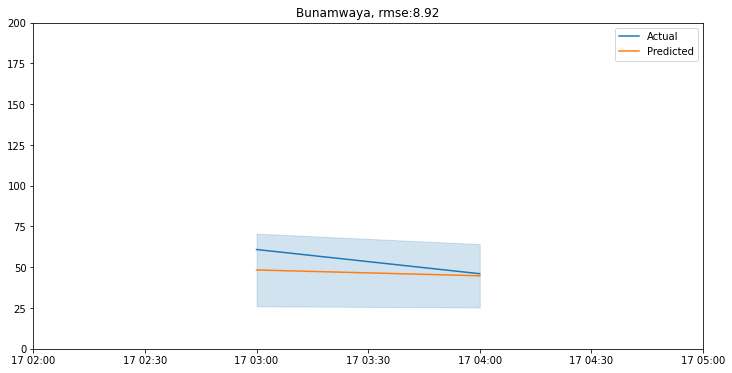

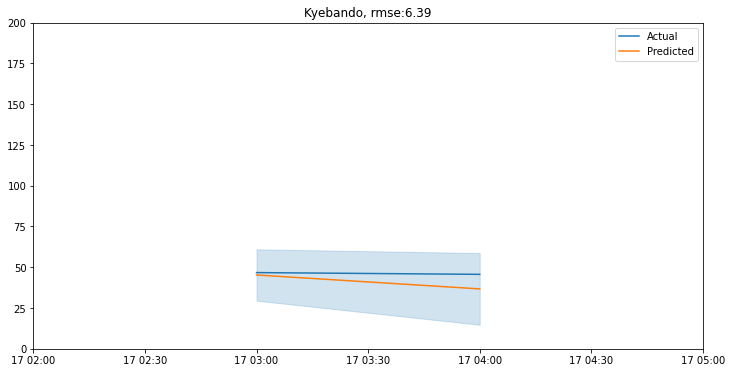

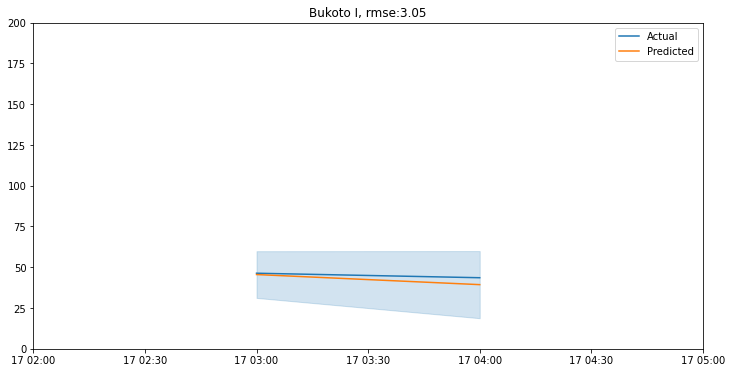

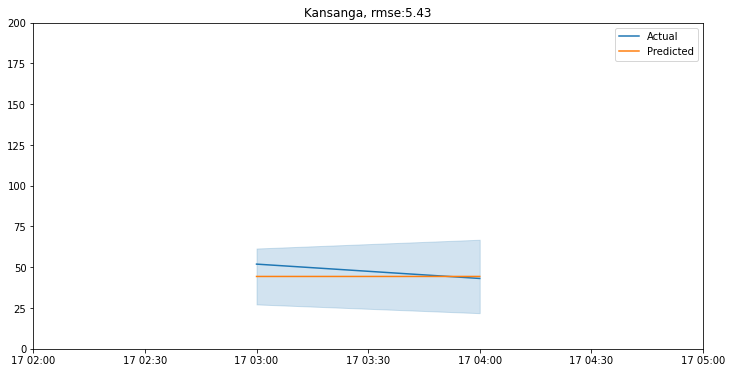

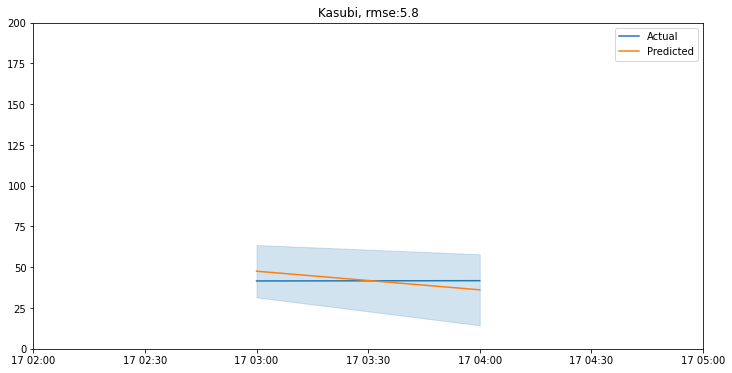

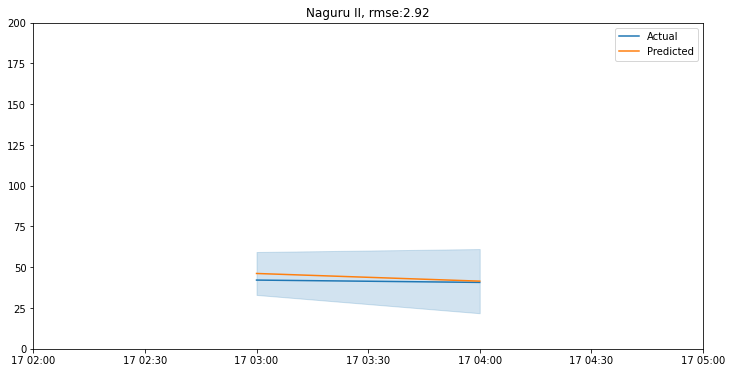

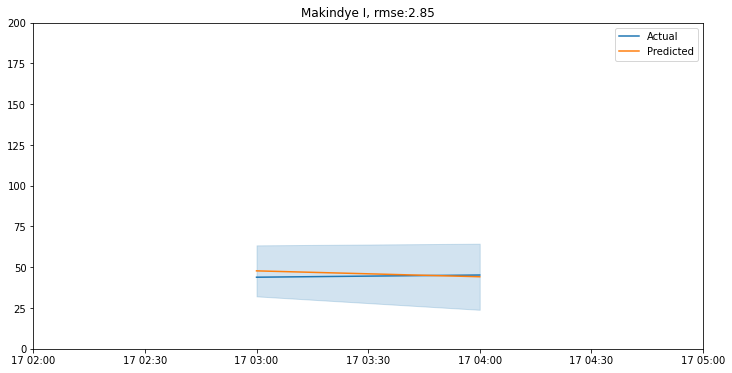

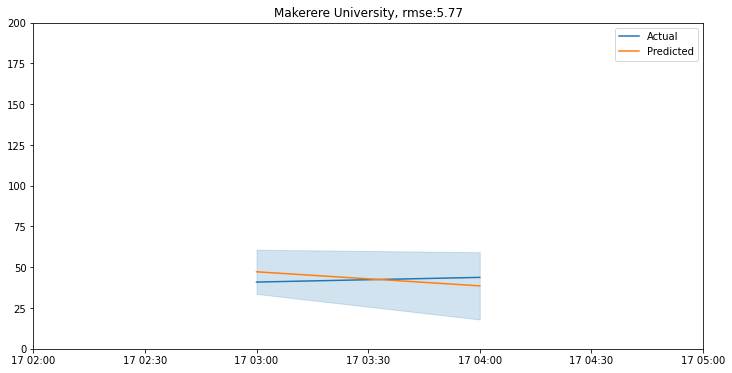

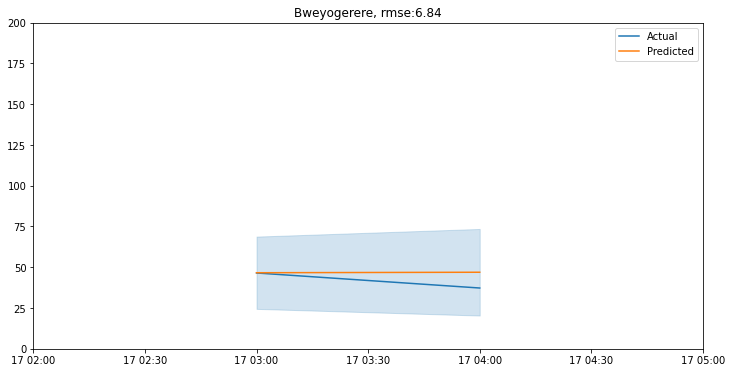

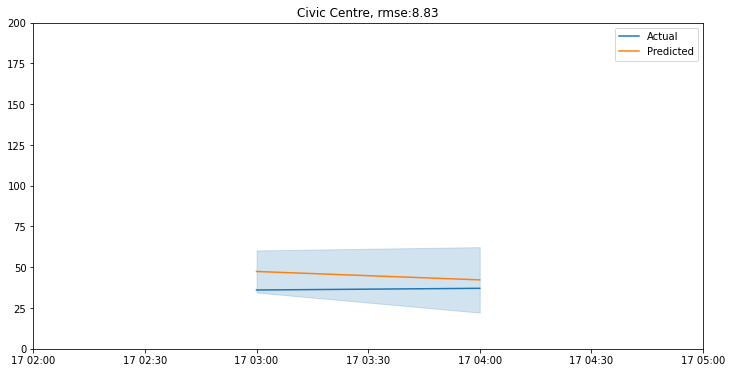

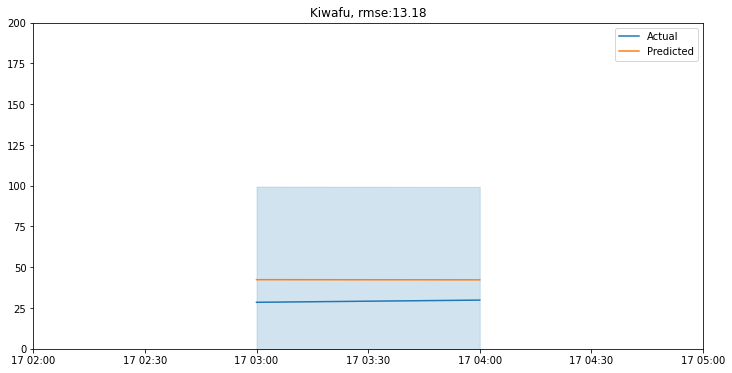

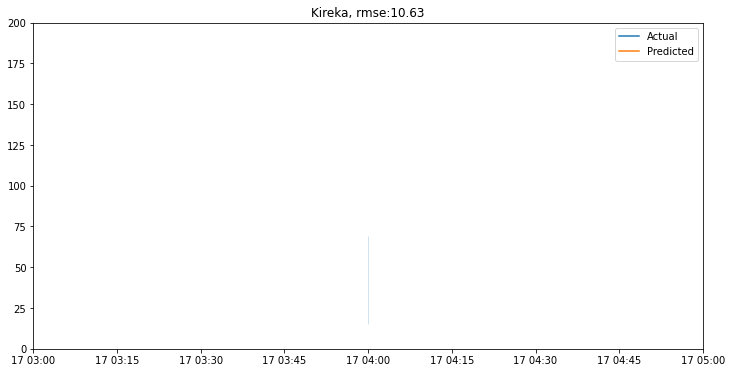

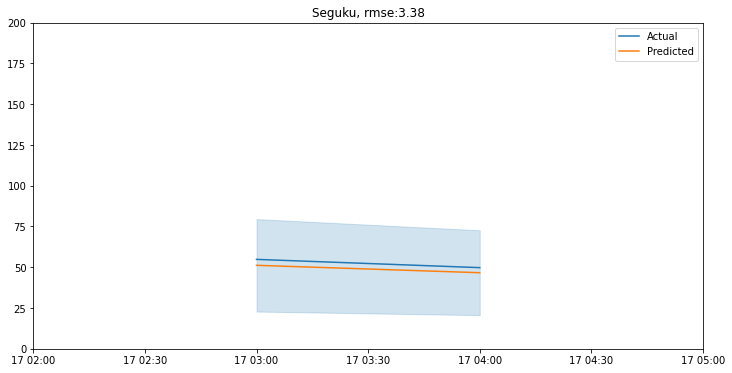

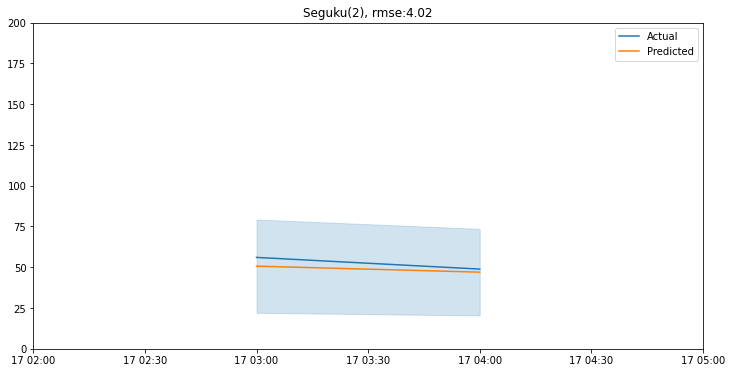

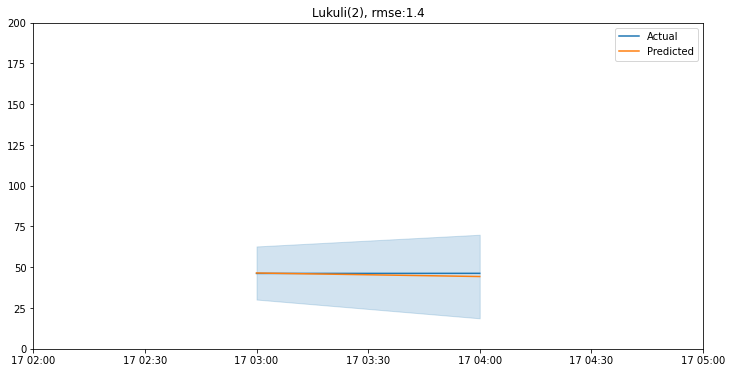

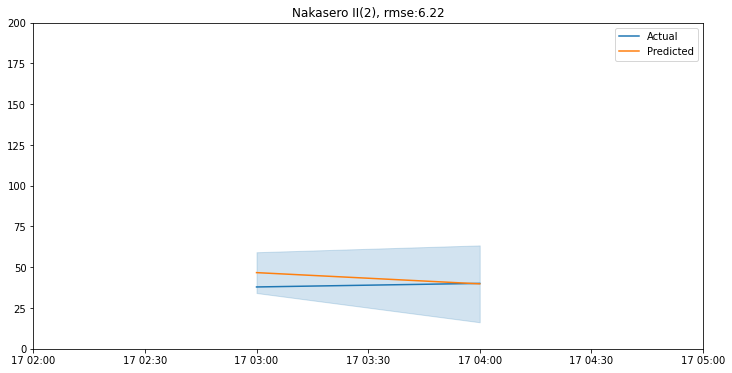

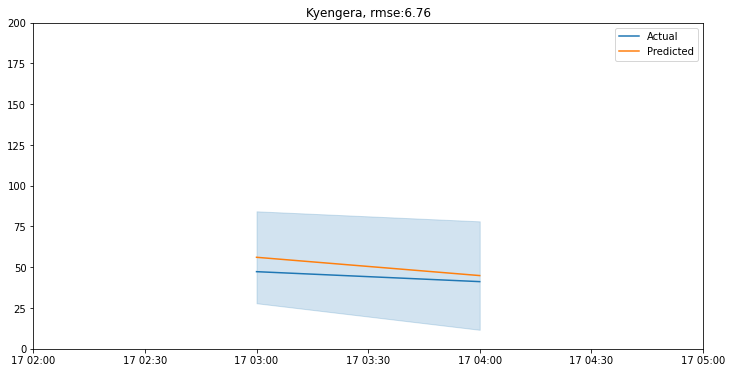

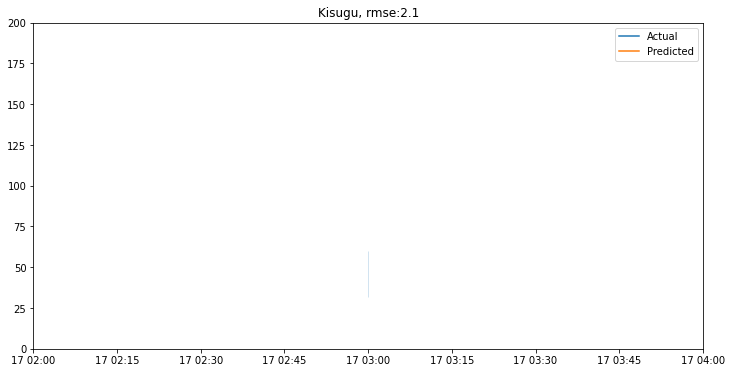

In [58]:
for i in range(len(longs)):
    try:
        location_name = locations_df.loc[locations_df['long'] == longs[i], 'location'].iloc[0]
        mean, var, Xtest, Ytest, rmse = cross_validation(X, Y, longs[i], lats[i])
        print(f'{location_name} successful')
        rmse_list.append({'location':location_name, 'rmse':rmse})

        plt.figure(figsize=(12,6))
        plt.title(f'{location_name}, rmse:{rmse}')
        plt.xlim(f2(Xtest[:,2]).min()-timedelta(hours=1), f2(Xtest[:,2]).max()+timedelta(hours=1))
        plt.ylim(0,200)
        plt.plot(f2(Xtest[:, 2]), Ytest, label='Actual')
        plt.plot(f2(Xtest[:, 2]), mean, label='Predicted')
        plt.fill_between(f2(Xtest[:, 2]),
                        mean[:,0]-1.96*np.sqrt(var[:, 0]),
                        mean[:,0]+1.96*np.sqrt(var[:, 0]),
                        color="C0",
                        alpha=0.2)
        plt.legend(loc='best')
        plt.savefig(f'../images/plots/{location_name}.png') 
        #plt.show()
    except Exception as e:
        print(f'{location_name} failed')
        print(e)

In [59]:
rmse_list

[{'location': 'Ntinda', 'rmse': 18.25},
 {'location': 'Bugolobi', 'rmse': 4.17},
 {'location': 'Nantabulirwa', 'rmse': 6.18},
 {'location': 'Kireka', 'rmse': 5.84},
 {'location': 'Luwafu', 'rmse': 0.68},
 {'location': 'Banda', 'rmse': 6.12},
 {'location': 'Nakasero II', 'rmse': 12.04},
 {'location': 'Kiwatule', 'rmse': 3.02},
 {'location': 'Kyaliwajjala', 'rmse': 4.68},
 {'location': 'Nansana West', 'rmse': 23.08},
 {'location': 'Nansana East', 'rmse': 9.6},
 {'location': 'Busega', 'rmse': 25.91},
 {'location': 'Bunamwaya', 'rmse': 8.92},
 {'location': 'Kyebando', 'rmse': 6.39},
 {'location': 'Bukoto I', 'rmse': 3.05},
 {'location': 'Kansanga', 'rmse': 5.43},
 {'location': 'Kasubi', 'rmse': 5.8},
 {'location': 'Naguru II', 'rmse': 2.92},
 {'location': 'Makindye I', 'rmse': 2.85},
 {'location': 'Makerere University', 'rmse': 5.77},
 {'location': 'Bweyogerere', 'rmse': 6.84},
 {'location': 'Civic Centre', 'rmse': 8.83},
 {'location': 'Kiwafu', 'rmse': 13.18},
 {'location': 'Kireka', 'rms